In [1]:
"""
Approach
1. Visualize Data; Are there some obvious correlations?; Is some data wrangling required (missing data etc);
2. Try basic approaches - Linear Regression; Decision Trees; 
3. Try advanced approaches - Neural Networks

Document results of each approach - approach name; hyper parameters chosen; results on training set (split it into training, cross-validation, test)

"""


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

np.set_printoptions(suppress=True)

TRAIN_CSV = './data/train.csv'
TEST_CSV = './data/test.csv'

td = pd.read_csv(TRAIN_CSV)

print ("Summary of Training Data")
display (td.describe(include='all'))
display (td.describe())


Summary of Training Data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Newell, Mr. Arthur Webster",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


c:\users\komalb\appdata\local\programs\python\python36-32\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


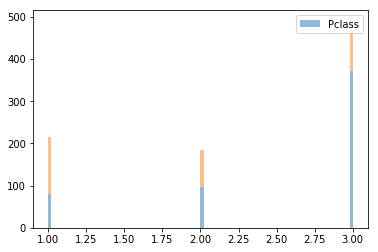

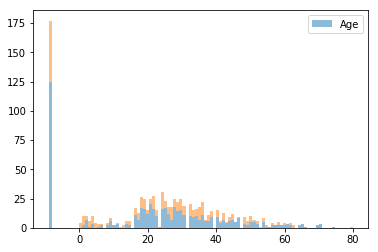

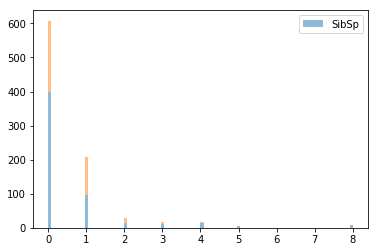

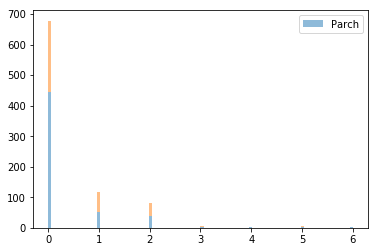

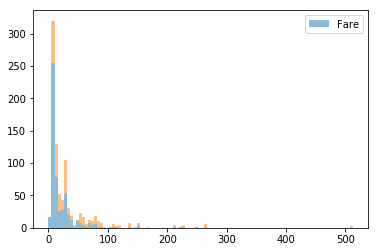

In [42]:
"""
'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'
"""

#print(type(td))
"""
for col in ['Pclass', 'Name', 'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']:
    td[col].isna()

"""

for col in ['Pclass', 'Age', 'SibSp','Parch', 'Fare']:
    plt.figure(1111)
    #f,g = plt.subplots(111)
    
    values = td[col]
    """
    print (col)
    print ("Empty values: " , sum(values.isna()))
    print (values.describe())
    print (values)
    """
    values = values.replace(np.nan, -9)
    
    plt.hist([values[td.Survived == 0], values[td.Survived == 1]],bins=100, alpha=0.5, stacked=True, label=col);
    plt.legend(loc='upper right')

    plt.show()

